# Import all the libraries here

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [5]:
def snake_columns(data):
    """
    Standarize and returns snake_case columns
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

# Load the data here

In [ ]:
data = pd.read_csv("../dataset/training_data.csv", sep='\t', names=["label", "text"])
df = data.copy()

In [7]:
df.shape

(34152, 2)

In [8]:
df.head(10)

,label,text
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...
5,0,racist alabama cops brutalize black boy while ...
6,0,fresh off the golf course
7,0,trump said some insanely racist stuff inside t...
8,0,former cia director slams trump over un bullying
9,0,brand-new pro-trump ad features so much a** ki...


# Exploratory Data Analysis

In [9]:
# null values
df.isnull().sum()

label    0
text     0
dtype: int64

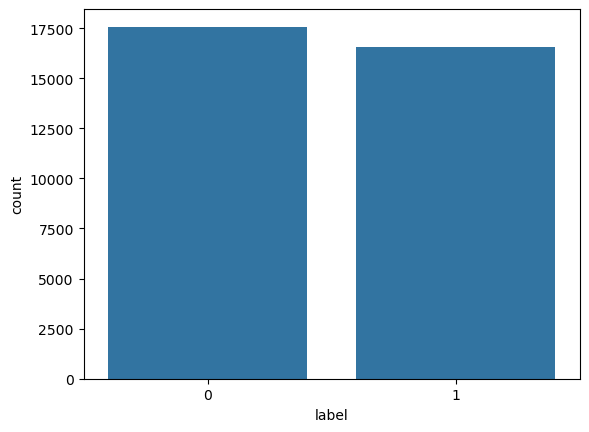

In [10]:
# distribution of label
sns.countplot(x=data["label"])
plt.show()

In [11]:
data["label"].value_counts()

label
0    17572
1    16580
Name: count, dtype: int64

**Overview**
- There is no null value in the dataset.
- `label` has two values: 0 (fake news) & 1 (real news)
- `label` has almost equal values of 0 and 1. We might need to remove some 0 values to unbias the output.
- Number of rows: 34152 

In [12]:
# sending target to the last
target = data.pop("label")
data["label"] = target

In [13]:
data

,text,label
0,donald trump sends out embarrassing new year‚s...,0
1,drunk bragging trump staffer started russian c...,0
2,sheriff david clarke becomes an internet joke ...,0
3,trump is so obsessed he even has obama‚s name ...,0
4,pope francis just called out donald trump duri...,0
...,...,...
34147,tears in rain as thais gather for late king's ...,1
34148,pyongyang university needs non-u.s. teachers a...,1
34149,philippine president duterte to visit japan ah...,1
34150,japan's abe may have won election\tbut many do...,1


**Comment**
- The whole dataset is my training data. So I don't need to do train_test_split.

# Feature Transformation

In [14]:
train_data = data

In [15]:
# cleaning string characters
train_data.iloc[:, 0].replace("[^a-zA-Z]", " ", regex=True, inplace=True)

In [16]:
train_data["text"]

0        donald trump sends out embarrassing new year s...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes an internet joke ...
3        trump is so obsessed he even has obama s name ...
4        pope francis just called out donald trump duri...
                               ...                        
34147    tears in rain as thais gather for late king s ...
34148    pyongyang university needs non u s  teachers a...
34149    philippine president duterte to visit japan ah...
34150    japan s abe may have won election but many don...
34151    demoralized and divided  inside catalonia s po...
Name: text, Length: 34152, dtype: object

In [17]:
train_data["text"] = train_data["text"].astype(str)

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34152 entries, 0 to 34151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    34152 non-null  object
 1   label   34152 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 533.8+ KB


In [19]:
train_headlines = []
for row in range(0, len(train_data.index)):
    train_headlines.append(train_data.iloc[row, 0])

In [20]:
train_headlines

['donald trump sends out embarrassing new year s eve message  this is disturbing',
 'drunk bragging trump staffer started russian collusion investigation',
 'sheriff david clarke becomes an internet joke for threatening to poke people  in the eye ',
 'trump is so obsessed he even has obama s name coded into his website  images ',
 'pope francis just called out donald trump during his christmas speech',
 'racist alabama cops brutalize black boy while he is in handcuffs  graphic images ',
 'fresh off the golf course',
 'trump said some insanely racist stuff inside the oval office',
 'former cia director slams trump over un bullying',
 'brand new pro trump ad features so much a   kissing it will make you sick',
 'papa john s founder retires',
 'paul ryan just told us he doesn t care about struggling families living in blue states',
 'bad news for trump    mitch mcconnell says no to repealing obamacare in     ',
 'lindsey graham trashes media for portraying trump as  kooky  forgets his own

# Count Vectorizer

In [21]:
countvector = CountVectorizer(ngram_range=(2, 2))

In [22]:
traindataset = countvector.fit_transform(train_headlines)

In [23]:
traindataset

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 360102 stored elements and shape (34152, 179297)>

# Model: Random Forest

In [24]:
train_data.head(3)

,text,label
0,donald trump sends out embarrassing new year s...,0
1,drunk bragging trump staffer started russian c...,0
2,sheriff david clarke becomes an internet joke ...,0


In [25]:
traindataset[:5]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 55 stored elements and shape (5, 179297)>

In [26]:
traindataset[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 179297))

In [27]:
ground_truth = train_data["label"]

In [30]:
# Implement RandomForest Classifier with additional parameters
randomclassifier = RandomForestClassifier(n_estimators=200, 
criterion='entropy', max_depth=10, random_state=42)

# n_estimators: number of trees in the forest
# criterion: function to measure the quality of a split. Entropy is the measure of impurity
# max_depth: maximum depth of the tree
# random_state: seed for random number generator

# Model training

In [31]:
randomclassifier.fit(traindataset, ground_truth)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)

# Cross validation

In [33]:
# Evaluate the model using cross-validation
scores = cross_val_score(randomclassifier, traindataset, ground_truth, cv=5)

In [34]:
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.56829161 0.55862978 0.54860908 0.54729136 0.53499268]
Mean cross-validation score: 0.5515629012770779


# Predictions

In [35]:
# load the testing data
test_data = pd.read_csv("../dataset/testing_data.csv", sep='\t', names=["label", "text"])


In [36]:
test_data.shape

(9984, 2)

In [37]:
test_data.head(2)

,label,text
0,2,copycat muslim terrorist arrested with assault...
1,2,wow! chicago protester caught on camera admits...


In [38]:
test_data["label"].value_counts()

label
2     9982
﻿0       2
Name: count, dtype: int64

In [39]:
test_headlines = []
for row in range(0, len(test_data.index)):
    test_headlines.append(test_data.iloc[row, 1])

In [40]:
test_headlines

['copycat muslim terrorist arrested with assault weapons',
 'wow! chicago protester caught on camera admits violent activity was pre-planned: ‚it‚s not gonna be peaceful‚',
 "germany's fdp look to fill schaeuble's big shoes",
 'mi school sends welcome back packet warning kids against wearing u.s. flag to school',
 "u.n. seeks 'massive' aid boost amid rohingya 'emergency within an emergency'",
 'did oprah just leave ‚nasty‚ hillary wishing she wouldn‚t have endorsed her? [video]',
 "france's macron says his job not 'cool' cites talks with turkey's erdogan",
 'flashback: chilling ‚60 minutes‚ interview with george soros nearly 20 years ago',
 'spanish foreign ministry says to expel north korean ambassador',
 "trump says cuba 'did some bad things' aimed at u.s. diplomats",
 'merkel names refugee expert as foreign policy adviser',
 'brazil house speaker says temer charges must be taken together',
 'finger in every pie: how cia produces our ‚news‚ and entertainment',
 'how malia obama‚s pot

In [41]:
testdataset = countvector.transform(test_headlines)

In [42]:
# Make predictions on the test data
predictions = randomclassifier.predict(testdataset)

In [43]:
predictions

array([0, 0, 0, ..., 0, 0, 0], shape=(9984,))

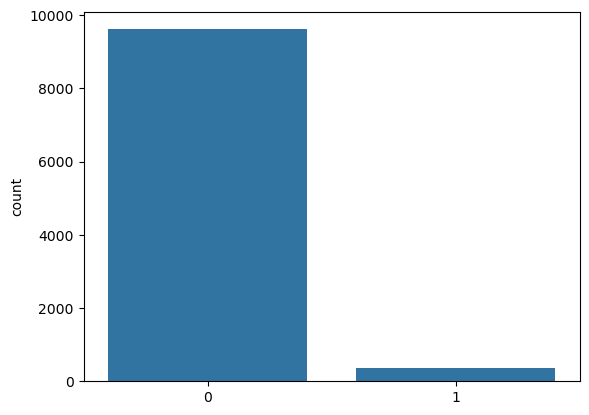

In [46]:
sns.countplot(x=predictions)
plt.show()

In [47]:
print(f"Size of ground truth: {len(test_data["label"])}")
print(f"Size of predictions: {len(predictions)}")

Size of ground truth: 9984
Size of predictions: 9984


In [48]:
test_data["predictions"] = predictions
test_data

,label,text,predictions
0,2,copycat muslim terrorist arrested with assault...,0
1,2,wow! chicago protester caught on camera admits...,0
2,2,germany's fdp look to fill schaeuble's big shoes,0
3,2,mi school sends welcome back packet warning ki...,0
4,2,u.n. seeks 'massive' aid boost amid rohingya '...,0
...,...,...,...
9979,2,boom! fox news leftist chris wallace attempts ...,0
9980,2,here it is: list of democrat hypocrites who vo...,0
9981,2,new fires ravage rohingya villages in northwes...,0
9982,2,meals on wheels shuts the lyin‚ lefties up wit...,0


# Model: Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model_lr = LogisticRegression()

In [52]:
traindataset

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 360102 stored elements and shape (34152, 179297)>

In [53]:
model_lr.fit(traindataset, ground_truth)

LogisticRegression()

In [56]:
# Evaluate the model using cross-validation
scores_lr = cross_val_score(model_lr, traindataset, ground_truth, cv=5)

In [57]:
print(f"Cross-validation scores: {scores_lr}")
print(f"Mean cross-validation score: {scores_lr.mean()}")

Cross-validation scores: [0.8509735  0.86180647 0.84421669 0.89033675 0.8818448 ]
Mean cross-validation score: 0.8658356433389855


In [58]:
# Make predictions on the test data
predictions_lr = model_lr.predict(testdataset)

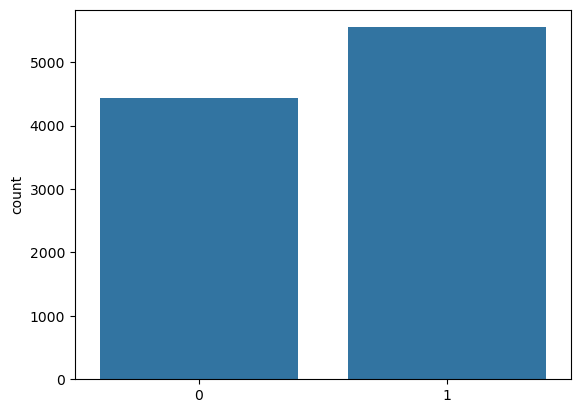

In [59]:
sns.countplot(x=predictions_lr)
plt.show()

In [60]:
test_data

,label,text,predictions
0,2,copycat muslim terrorist arrested with assault...,0
1,2,wow! chicago protester caught on camera admits...,0
2,2,germany's fdp look to fill schaeuble's big shoes,0
3,2,mi school sends welcome back packet warning ki...,0
4,2,u.n. seeks 'massive' aid boost amid rohingya '...,0
...,...,...,...
9979,2,boom! fox news leftist chris wallace attempts ...,0
9980,2,here it is: list of democrat hypocrites who vo...,0
9981,2,new fires ravage rohingya villages in northwes...,0
9982,2,meals on wheels shuts the lyin‚ lefties up wit...,0


In [61]:
test_data["predictions_log_reg"] = predictions_lr

In [64]:
test_data.rename({"predictions" : "predictions_rand_for"}, inplace=True)

In [65]:
test_data

,label,text,predictions,predictions_log_reg
0,2,copycat muslim terrorist arrested with assault...,0,0
1,2,wow! chicago protester caught on camera admits...,0,0
2,2,germany's fdp look to fill schaeuble's big shoes,0,1
3,2,mi school sends welcome back packet warning ki...,0,0
4,2,u.n. seeks 'massive' aid boost amid rohingya '...,0,1
...,...,...,...,...
9979,2,boom! fox news leftist chris wallace attempts ...,0,0
9980,2,here it is: list of democrat hypocrites who vo...,0,0
9981,2,new fires ravage rohingya villages in northwes...,0,1
9982,2,meals on wheels shuts the lyin‚ lefties up wit...,0,0


In [ ]:
# save the files
test_data.to_csv("../dataset/predictions.csv")

**Summary**
- `LogisticRegression` works better than `RandomForest`